## VGG16 MODEL for Age and Gender Prediction

This notebook contiains the source code used by me for gender and age prediction on the UTKFace dataset.The dataset containes approximately 23k images of people of various ages.There are two ways of implementing the VGG16 model,one using the pretrained weights of the Imagenet dataset on which the model was originally trained and the second one is without these pretrained weights.The ACCURACY metric here is not a good way to check the functioning of the model since if the model predicts the age of a person with an error of +/- 10 percent then also the model is functioning preety well even by medical standards. So for the age prediciton part it is not suitable to just check the model using the accuracy metric.

In [0]:
import os

In [166]:
# GPU usage
import tensorflow as tf
if tf.test.gpu_device_name():
    print('GPU Available')
else:
    print("Please install GPU version of TF")

GPU Available


In [5]:
len(os.listdir('/content/UTKFace'))

23708

In [3]:
# importing libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import keras
from keras.layers import *
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.models import Sequential
from keras.optimizers import Adam
from keras.models import Model
from keras.initializers import glorot_uniform
from keras.utils.np_utils import to_categorical
from keras.applications.vgg16 import VGG16

Using TensorFlow backend.


In [0]:
str_file=[]
for file in os.listdir('/content/UTKFace'):
  str_file.append(file)

In [6]:
str_file[1]

'27_1_1_20170116023622621.jpg.chip.jpg'

In [7]:
str_file[1].split('_')[0]

'27'

In [0]:
# loading the data of the age/gender and images 
age=[]
gender=[]
images=[]
path='/content/UTKFace'
from PIL import Image

for filename in str_file:
    gender.append(filename.split('_')[1])
    age.append(filename.split('_')[0])
    img_path=os.path.join(path,filename)
    img=cv2.imread(img_path)
    img = Image.fromarray(img, 'RGB')
    size_image = img.resize((128, 128))
    images.append(np.array(size_image))


In [13]:
print(len(age),len(gender))

23708 23708


In [0]:
images=np.array(images)
gender=np.array(gender)
age=np.array(age)

In [0]:
num_classes1=117 # max_age +1

In [ ]:
# shuffling the dataset.
s=np.arange(images.shape[0])
np.random.shuffle(s)
images=images[s]
age=age[s]
gender=gender[s]

In [0]:
# preparing the training and the test data
len_data=len(images)
(x_train,x_test)=images[(int)(0.2*len_data):],images[:(int)(0.2*len_data)]
x_train = x_train.astype('float32')/255 # As we are working on image data we are normalizing data by divinding 255.
x_test = x_test.astype('float32')/255
train_len=len(x_train)
test_len=len(x_test)

In [0]:
(y_train,y_test)=age[(int)(0.2*len_data):],age[:(int)(0.2*len_data)]

In [0]:
# labels for ages
y_train1=keras.utils.to_categorical(y_train,num_classes1)
y_test1=keras.utils.to_categorical(y_test,num_classes1)

In [0]:
(y_train,y_test)=gender[(int)(0.2*len_data):],gender[:(int)(0.2*len_data)]

In [0]:
# labels for genders
num_classes=2 # genders 0:female 1:male
y_train=keras.utils.to_categorical(y_train,num_classes)
y_test=keras.utils.to_categorical(y_test,num_classes)

In [0]:
# model withour pretrained weights
def untrained(num_classes): 
  model1 = Sequential()
  model1.add(Conv2D(input_shape=(128,128,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
  model1.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
  model1.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
  model1.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
  model1.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
  model1.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
  model1.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
  model1.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
  model1.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
  model1.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
  model1.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
  model1.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
  model1.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
  model1.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
  model1.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
  model1.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
  model1.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
  model1.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
  model1.add(Flatten())
  model1.add(Dense(units=4096,activation="relu"))
  model1.add(Dense(units=4096,activation="relu"))
  model1.add(Dense(units=num_classes, activation="softmax"))

  opt = Adam(lr=0.001)
  model1.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])
  model1.summary()
  return model1

In [168]:
model1=untrained(num_classes)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_40 (Conv2D)           (None, 128, 128, 64)      1792      
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 128, 128, 64)      36928     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 64, 64, 128)       73856     
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 64, 64, 128)       147584    
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 32, 32, 128)       0         
_________________________________________________________________
conv2d_44 (Conv2D)           (None, 32, 32, 256)      

In [35]:
hist=model1.fit(x=x_train, y=y_train,batch_size=128, epochs=10, verbose=1)

Epoch 1/10
18967/18967 [==============================] - 111s 6ms/step - loss: 0.6927 - accuracy: 0.5230
Epoch 2/10
18967/18967 [==============================] - 107s 6ms/step - loss: 0.6925 - accuracy: 0.5215
Epoch 3/10
18967/18967 [==============================] - 107s 6ms/step - loss: 0.6927 - accuracy: 0.5205
Epoch 4/10
18967/18967 [==============================] - 105s 6ms/step - loss: 0.6930 - accuracy: 0.5198
Epoch 5/10
18967/18967 [==============================] - 105s 6ms/step - loss: 0.6929 - accuracy: 0.5133
Epoch 6/10
18967/18967 [==============================] - 105s 6ms/step - loss: 0.6930 - accuracy: 0.5172
Epoch 7/10
18967/18967 [==============================] - 105s 6ms/step - loss: 0.6926 - accuracy: 0.5182
Epoch 8/10
18967/18967 [==============================] - 105s 6ms/step - loss: 0.6925 - accuracy: 0.5243
Epoch 9/10
18967/18967 [==============================] - 105s 6ms/step - loss: 0.6927 - accuracy: 0.5228
Epoch 10/10
18967/18967 [=====================

In [191]:
# pretrained vgg16 models for gender prediciton
IMAGE_SIZE = [128, 128] 

# using the VGG16 model but not including the final output layer by using the command (include_top=False).
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# don't train existing weights
for layer in vgg.layers:
    layer.trainable = False

# additional layers
x = Flatten()(vgg.output)
prediction = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=vgg.input, outputs=prediction)
model.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 128, 128, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 128, 128, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 128, 128, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 64, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 64, 64, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 64, 64, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 32, 32, 128)       0   

In [195]:
opt = Adam(lr=0.001)
model.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])
hist1=model.fit(x=x_train, y=y_train,batch_size=128, epochs=10, verbose=1,validation_data=(x_test,y_test))

Train on 18967 samples, validate on 4741 samples
Epoch 1/10
18967/18967 [==============================] - 44s 2ms/step - loss: 0.5157 - accuracy: 0.8056 - val_loss: 0.3426 - val_accuracy: 0.8452
Epoch 2/10
18967/18967 [==============================] - 45s 2ms/step - loss: 0.3004 - accuracy: 0.8745 - val_loss: 0.3072 - val_accuracy: 0.8709
Epoch 3/10
18967/18967 [==============================] - 45s 2ms/step - loss: 0.2674 - accuracy: 0.8922 - val_loss: 0.2985 - val_accuracy: 0.8764
Epoch 4/10
18967/18967 [==============================] - 45s 2ms/step - loss: 0.2496 - accuracy: 0.9016 - val_loss: 0.2941 - val_accuracy: 0.8743
Epoch 5/10
18967/18967 [==============================] - 45s 2ms/step - loss: 0.2426 - accuracy: 0.9027 - val_loss: 0.2944 - val_accuracy: 0.8791
Epoch 6/10
18967/18967 [==============================] - 45s 2ms/step - loss: 0.2309 - accuracy: 0.9116 - val_loss: 0.3026 - val_accuracy: 0.8728
Epoch 7/10
18967/18967 [==============================] - 46s 2ms/ste

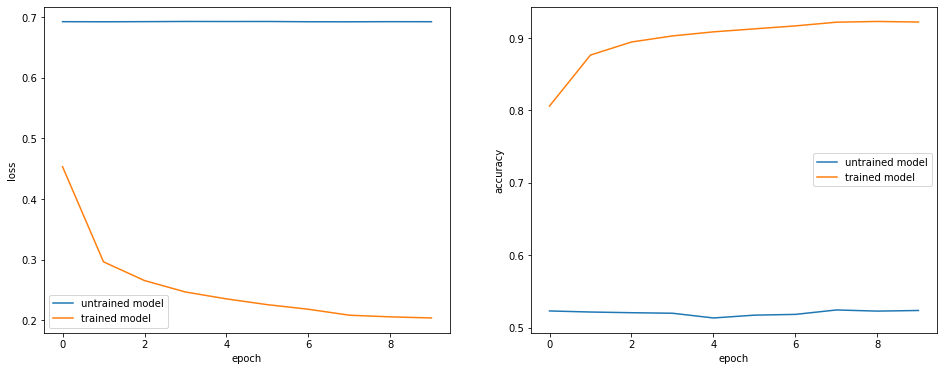

In [55]:
# loss
plt.figure(figsize=(16,6))
plt.subplot(1, 2, 1)
plt.plot(hist.history['loss'], label='untrained model')
plt.plot(hist1.history['loss'], label='trained model')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()

# accuracy
plt.subplot(1,2,2)
plt.plot(hist.history['accuracy'], label='untrained model')
plt.plot(hist1.history['accuracy'], label='trained model')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()

plt.show()

In [0]:
pred_gender=model.predict(x_test)
pred=np.argmax(pred_gender,axis=1)

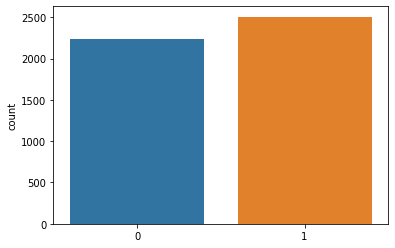

In [144]:
# seeing the number of each category identified {0:female,1:male}
import seaborn as sns
sns.countplot(pred)

In [169]:
model1=untrained(num_classes1)

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_53 (Conv2D)           (None, 128, 128, 64)      1792      
_________________________________________________________________
conv2d_54 (Conv2D)           (None, 128, 128, 64)      36928     
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_55 (Conv2D)           (None, 64, 64, 128)       73856     
_________________________________________________________________
conv2d_56 (Conv2D)           (None, 64, 64, 128)       147584    
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 32, 32, 128)       0         
_________________________________________________________________
conv2d_57 (Conv2D)           (None, 32, 32, 256)      

In [148]:
hist=model1.fit(x=x_train, y=y_train1,batch_size=128, epochs=10, verbose=1)

Epoch 1/10
18967/18967 [==============================] - 105s 6ms/step - loss: 4.1665 - accuracy: 0.0840
Epoch 2/10
18967/18967 [==============================] - 105s 6ms/step - loss: 4.0842 - accuracy: 0.0901
Epoch 3/10
18967/18967 [==============================] - 106s 6ms/step - loss: 4.0784 - accuracy: 0.0901
Epoch 4/10
18967/18967 [==============================] - 106s 6ms/step - loss: 4.0770 - accuracy: 0.0901
Epoch 5/10
18967/18967 [==============================] - 106s 6ms/step - loss: 4.0762 - accuracy: 0.0901
Epoch 6/10
18967/18967 [==============================] - 106s 6ms/step - loss: 4.0753 - accuracy: 0.0901
Epoch 7/10
18967/18967 [==============================] - 106s 6ms/step - loss: 4.0743 - accuracy: 0.0901
Epoch 8/10
18967/18967 [==============================] - 106s 6ms/step - loss: 4.0726 - accuracy: 0.0901
Epoch 9/10
18967/18967 [==============================] - 106s 6ms/step - loss: 4.0733 - accuracy: 0.0901
Epoch 10/10
18967/18967 [=====================

In [15]:
IMAGE_SIZE = [128, 128] 

# using the VGG16 model but not including the final output layer by using the command (include_top=False).
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# don't train existing weights
for layer in vgg.layers:
    layer.trainable = False

# additional layers
x = Flatten()(vgg.output)
prediction = Dense(num_classes1, activation='softmax')(x)
model = Model(inputs=vgg.input, outputs=prediction)
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 128, 128, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 128, 128, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 128, 128, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 64, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 64, 64, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 64, 64, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 32, 32, 128)       0   

In [21]:
opt = Adam(lr=0.01)
model.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])
hist1=model.fit(x=x_train, y=y_train1,batch_size=128, epochs=20, verbose=1,validation_data=(x_test,y_test1))

Train on 21338 samples, validate on 2370 samples
Epoch 1/20
21338/21338 [==============================] - 50s 2ms/step - loss: 5.8267 - accuracy: 0.1664 - val_loss: 6.4904 - val_accuracy: 0.0954
Epoch 2/20
21338/21338 [==============================] - 45s 2ms/step - loss: 3.2482 - accuracy: 0.3113 - val_loss: 6.4561 - val_accuracy: 0.1304
Epoch 3/20
21338/21338 [==============================] - 47s 2ms/step - loss: 2.6397 - accuracy: 0.4060 - val_loss: 7.0424 - val_accuracy: 0.0907
Epoch 4/20
21338/21338 [==============================] - 46s 2ms/step - loss: 2.3216 - accuracy: 0.4652 - val_loss: 6.9637 - val_accuracy: 0.1274
Epoch 5/20
21338/21338 [==============================] - 47s 2ms/step - loss: 1.9585 - accuracy: 0.5350 - val_loss: 8.0968 - val_accuracy: 0.1004
Epoch 6/20
21338/21338 [==============================] - 46s 2ms/step - loss: 1.6657 - accuracy: 0.5749 - val_loss: 7.8337 - val_accuracy: 0.1046
Epoch 7/20
21338/21338 [==============================] - 48s 2ms/ste

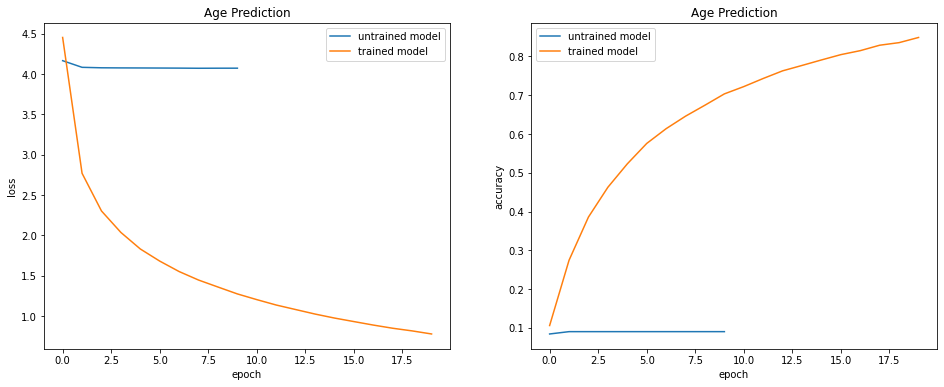

In [154]:
# loss
plt.figure(figsize=(16,6))
plt.subplot(1, 2, 1)
plt.plot(hist.history['loss'], label='untrained model')
plt.plot(hist1.history['loss'], label='trained model')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.title('Age Prediction')

# accuracy
plt.subplot(1,2,2)
plt.plot(hist.history['accuracy'], label='untrained model')
plt.plot(hist1.history['accuracy'], label='trained model')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.title('Age Prediction')
plt.show()

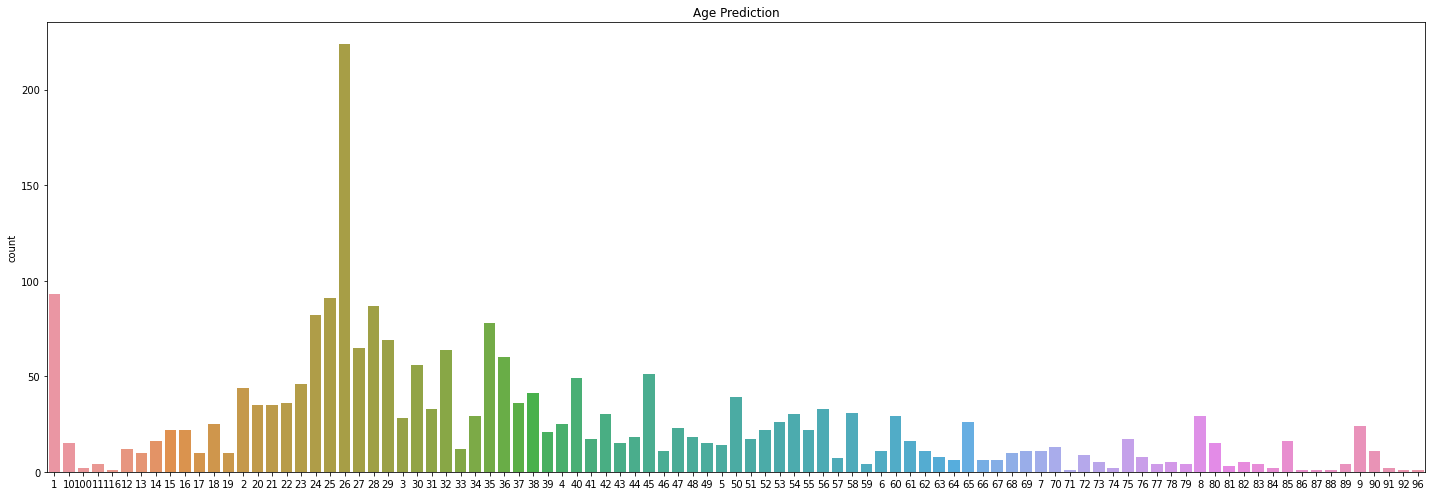

In [33]:
# the distribution of the original validation dataset
plt.figure(figsize=(20,7))
sns.countplot(y_test).set_title("Age Prediction")
plt.tight_layout()

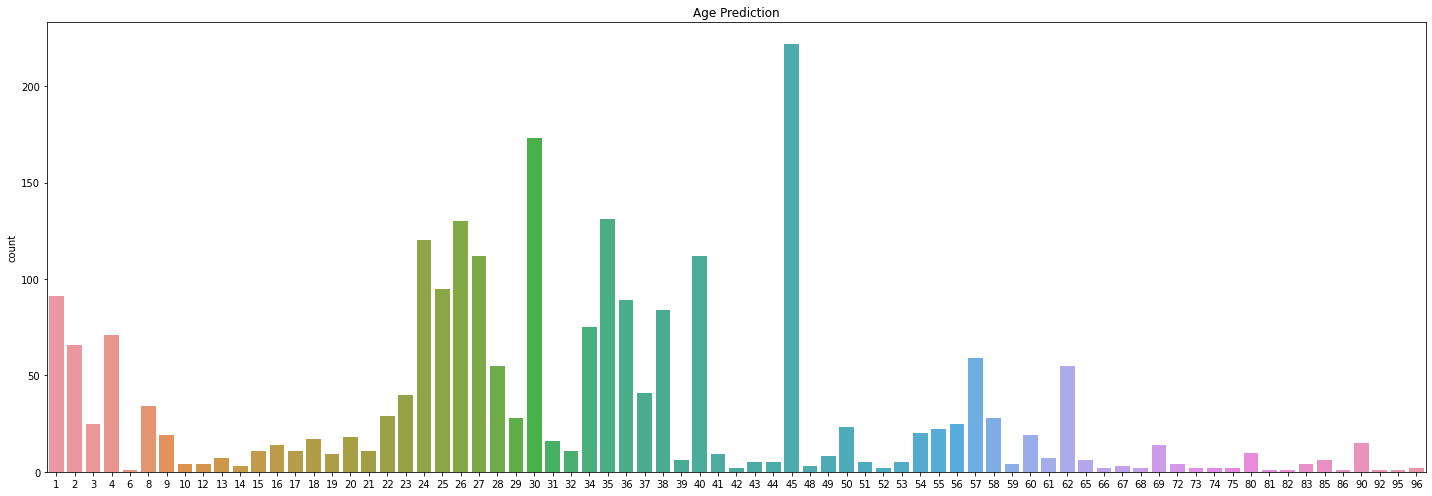

In [29]:
# predicted age distribution by the model on the validation set.
pred=model.predict(x_test)
pred=np.argmax(pred,axis=1)
plt.figure(figsize=(20,7))
sns.countplot(pred).set_title("Age Prediction")
plt.tight_layout()

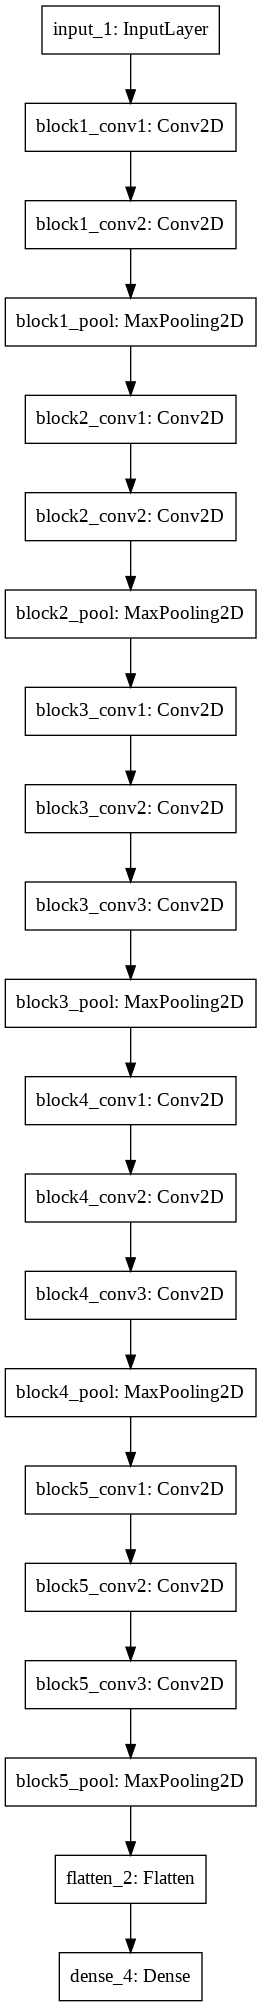

In [80]:
# model image.
keras.utils.plot_model(model, to_file='model.png', show_shapes=False, show_layer_names=True, rankdir='TB', expand_nested=False, dpi=96)